# Algoritma Naïve Bayes

# ANGGOTA KELOMPOK
- Fenny Jong (535210001)
- Kelvin Ferdinand (535210027)
- Jefri Jaya (535210048) 

# Load Dataset

In [1]:
import pandas as pd

# membaca dataset
dataset= pd.read_csv("dataset no 2.csv")
dataset

,No,Jenis Kelamin,Status Mahasiswa,Status Pernikahan,IPK Semester 1-6,Status Kelulusan
0,1,Laki-laki,Mahasiswa,Belum,3.17,Tepat
1,2,Laki-laki,Bekerja,Belum,3.30,Tepat
2,3,Perempuan,Mahasiswa,Belum,3.01,Tepat
3,4,Perempuan,Mahasiswa,Menikah,3.25,Tepat
4,5,Laki-laki,Bekerja,Menikah,3.20,Tepat
5,6,Laki-laki,Bekerja,Menikah,2.50,Terlambat
6,7,Perempuan,Bekerja,Menikah,3.00,Terlambat
7,8,Perempuan,Bekerja,Belum,2.70,Terlambat
8,9,Laki-laki,Bekerja,Belum,2.40,Terlambat
9,10,Perempuan,Mahasiswa,Menikah,2.50,Terlambat


# Scatter Plot

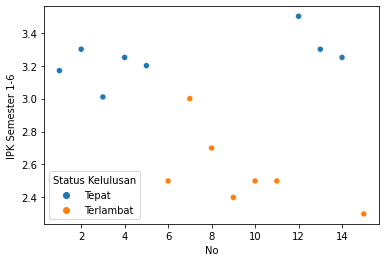

In [2]:
# menampilkan hubungan antara dua variabel numerik.
import seaborn as sns
import matplotlib.pyplot as plt
 
sns.scatterplot(x='No',y='IPK Semester 1-6', data=dataset,
            hue='Status Kelulusan')
 
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

X = dataset.drop(columns='Status Kelulusan')
y = dataset['Status Kelulusan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3, 5) (12, 5) (3,) (12,)


In [4]:
from sklearn.compose import ColumnTransformer
from jcopml.pipeline import num_pipe, cat_pipe

preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['No', 'IPK Semester 1-6']),
    ('categoric', cat_pipe(encoder='onehot'), ['Jenis Kelamin', 'Status Mahasiswa', 'Status Pernikahan']),
])

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', GaussianNB())
])

In [6]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['No', 'IPK Semester 1-6']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Jenis Kelamin',
                                                   'Status Mahasiswa',
                                                   'Status Pernikahan'])])),


In [7]:
pipeline.score(X_train, y_train)

1.0

In [8]:
pipeline.score(X_test, y_test)

0.5

# Confusion Matrix

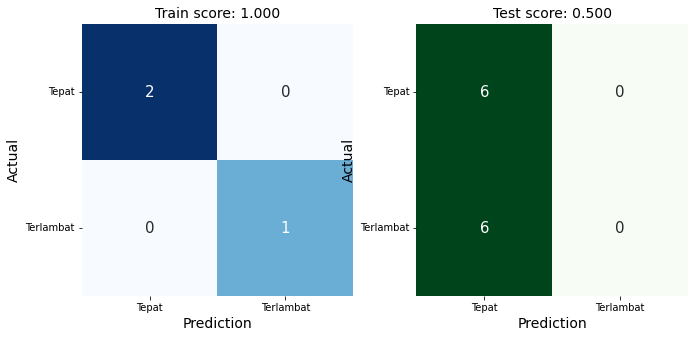

In [9]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(X_train, y_train, X_test, y_test, pipeline)

# Membuat Prediksi dari Data Testing

In [10]:
# Create a test dataset
X_test = pd.DataFrame({
    'No': [1],
    'Jenis Kelamin': ['Laki-laki'],
    'Status Mahasiswa': ['Mahasiswa'],
    'Status Pernikahan': ['Belum'],
    'IPK Semester 1-6': [2.7]
})

# Make predictions on the test dataset
y_pred = pipeline.predict(X_test)

# Print the predicted graduation status
if y_pred[0] == 'Tepat':
    print('Prediksi status kelulusan: Terlambat')
else:
    print('Prediksi status kelulusan:', y_pred[0])


Prediksi status kelulusan: Terlambat
